<a href="https://colab.research.google.com/github/Bishal-net/AI-ML-Workshop-Projects-Set6-Set7/blob/main/Assignment%5BSET_6%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully!


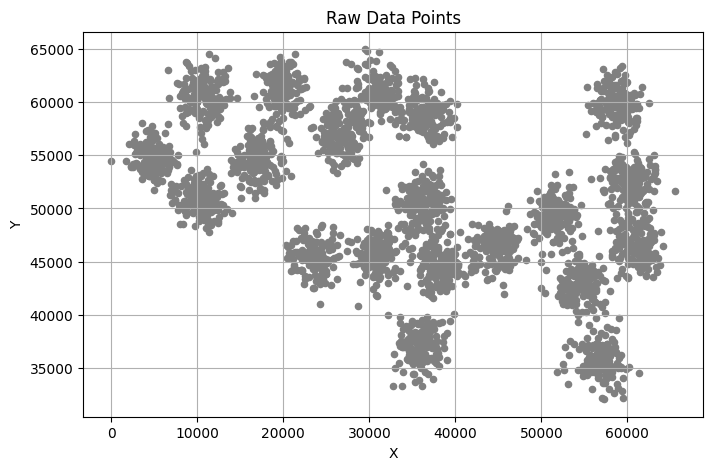

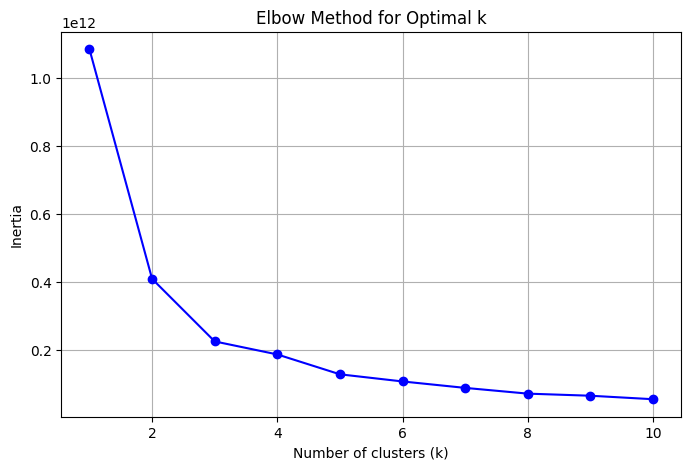

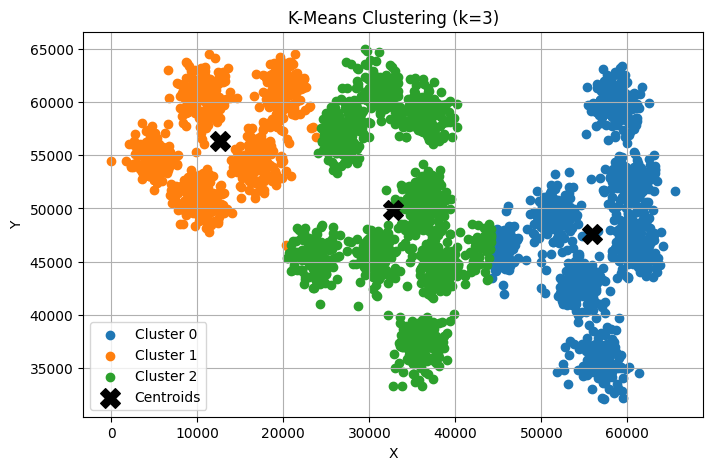

In [ ]:
# SET 6: Data Clustering

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load the dataset with error handling
try:
    data = pd.read_csv("a1.txt", sep=" ", header=None)
    data.columns = ["X", "Y"]
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: File not found.")
except pd.errors.ParserError:
    print("Error: Could not parse the file.")
except Exception as e:
    print("Unexpected error:", e)

# Step 3: Visualize raw data
plt.figure(figsize=(8, 5))
plt.scatter(data["X"], data["Y"], s=20, color='gray')
plt.title("Raw Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# Step 4: Elbow method to find optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Step 5: Apply K-Means clustering
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=0)
clusters = kmeans.fit_predict(data)
data["Cluster"] = clusters

# Step 6: Visualize the clusters
plt.figure(figsize=(8, 5))
for i in range(k_optimal):
    cluster_data = data[data["Cluster"] == i]
    plt.scatter(cluster_data["X"], cluster_data["Y"], label=f"Cluster {i}")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title(f"K-Means Clustering (k={k_optimal})")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

